# 6.6 Sourcing & Analyzing Time-Series Data

### Contents

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the data

### 1. Importing libraries and data

In [1]:
import quandl 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [2]:
#Display the graph without the need to "call" it specifically
%matplotlib inline

In [3]:
path = 'C:/Users/midov/Documents/Studies/Data Analysis/Immersion into Data Analytics/Achievement 6_Advanced Analytics & Dashboard Design/Causes of Death Analysis'

In [4]:
#Import data 
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data','df_merged_all3.csv'))

In [5]:
df.shape

(6771, 41)

In [6]:
df.head()

,Unnamed: 0,Country,Year,Meningitis,Alzheimer_s_Disease_and_Other_Dementias,Parkinson_s_Disease,Nutritional_Deficiencies,Malaria,Drowning,Interpersonal_Violence,...,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,Total_no_of_Deaths,Indicator,Sex,Age Group,Number,Death_indicator,Health_expedinture
0,1,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,269843.56,8.56,All,[0],1261,Low,Middle
1,2,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,268813.56,8.56,All,[1-4],230,Low,Middle
2,3,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,268718.56,8.56,All,[5-9],134,Low,Middle
3,4,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,268736.56,8.56,All,[10-14],151,Low,Middle
4,5,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,269121.56,8.56,All,[15-19],535,Low,Middle


## 2. Subsetting, wrangling, and cleaning time-series data

In [7]:
#Remove unnecessary variables
df_year_resp = df.drop(columns =['Unnamed: 0','Country','Sex','Death_indicator','Age Group','Health_expedinture','Meningitis','Alzheimer_s_Disease_and_Other_Dementias','Parkinson_s_Disease',
                       'Nutritional_Deficiencies','Cardiovascular_Diseases','Neoplasms','Malaria','Drowning','Interpersonal_Violence','Maternal_Disorders','HIV_AIDS',
                       'Drug_Use_Disorders','Tuberculosis','Neonatal_Disorders','Alcohol_Use_Disorders','Self_harm','Exposure_to_Forces_of_Nature',
                       'Diarrheal_Diseases','Environmental_Heat_and_Cold_Exposure','Conflict_and_Terrorism','Chronic_Kidney_Disease',
                       'Poisonings','Protein_Energy_Malnutrition','Road_Injuries','Cirrhosis_and_Other_Chronic_Liver_Diseases',
                       'Fire_Heat_and_Hot_Substances','Acute_Hepatitis','Digestive_Diseases','Lower_Respiratory_Infections','Diabetes_Mellitus',
                       'Indicator','Number','Total_no_of_Deaths'])

##### The choice of data is determined by the top cause (Chronic Respiratory Disease) of all the deaths worldwide, according to the previous research. The change in 10 years period in the deaths due to this cause of deaths is of matter of interest in this analysis.

In [8]:
df_year_resp

,Year,Chronic_Respiratory_Diseases
0,2009,8342
1,2009,8342
2,2009,8342
3,2009,8342
4,2009,8342
...,...,...
6766,2019,224988
6767,2019,224988
6768,2019,224988
6769,2019,224988


In [9]:
#Create a new dataframe with median Chronic_Respiratory_Diseases grouped by years

data = df_year_resp.groupby('Year').agg({'Chronic_Respiratory_Diseases': ['median']})

In [10]:
data.head()

,Chronic_Respiratory_Diseases
,median
Year,
2009,40051.0
2010,40315.0
2011,38552.0
2012,39078.0
2013,40735.0


In [11]:
data.dtypes

Chronic_Respiratory_Diseases  median    float64
dtype: object

In [12]:
#Check for missing value
data.isnull().sum()

Chronic_Respiratory_Diseases  median    0
dtype: int64

In [13]:
data

,Chronic_Respiratory_Diseases
,median
Year,
2009,40051.0
2010,40315.0
2011,38552.0
2012,39078.0
2013,40735.0
2014,41462.0
2015,43712.0
2016,44334.0


##### Year is the index

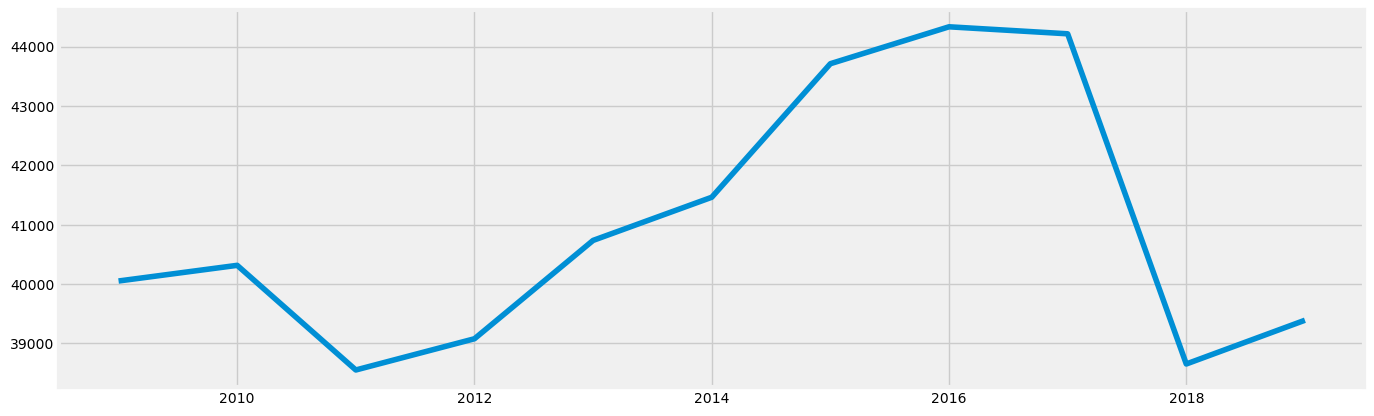

In [14]:
#Plot the data using matplotlib
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

## 3. Time series analysis: decomposition

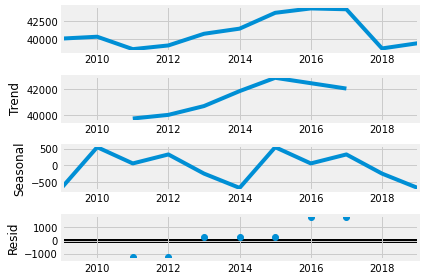

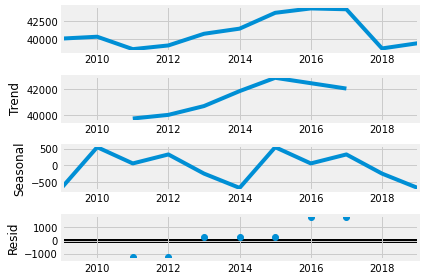

In [15]:
#Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=5)
decomposition.plot()

In [16]:
#Define a fixed size for all special charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

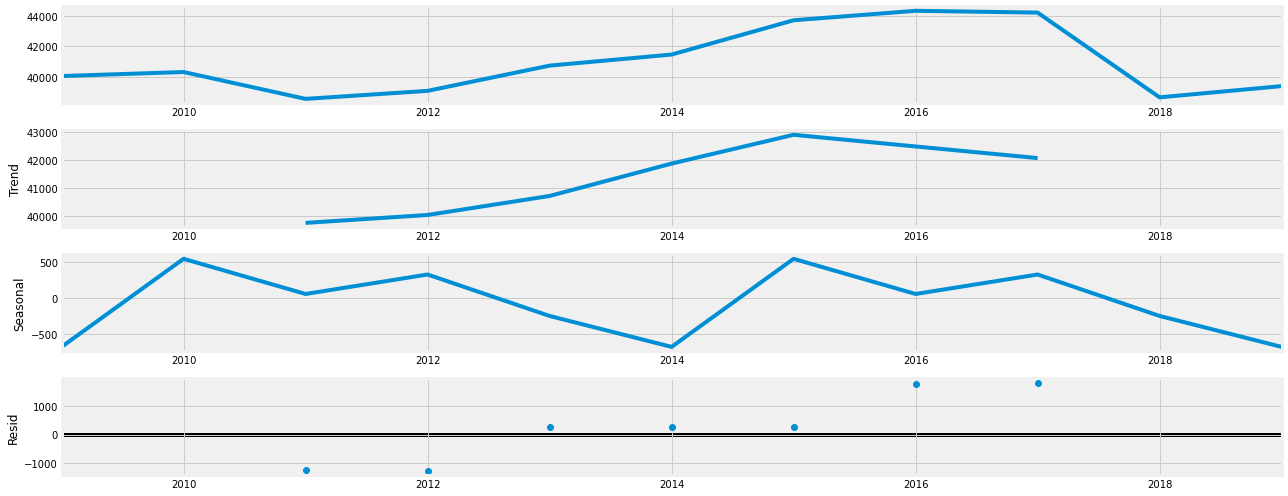

In [17]:
#Plot the separate components
decomposition.plot()
plt.show()

##### The level and the underlying trend look the same (because the data hasn't much noise) but still differ (because the data are unsmoothed). There is an upward trend of the median numbers of Chronic Respiratory Diseases from 2011 up to 2015 with the consequent smooth downfall. Seasonality shows a regular pattern except for 2014 when there were the reduction of deaths due to Chronic Respiratory Diseases. The noise is explained by the data that were not smoothed.

## 4. Testing for stationarity

In [18]:
#Check for stationarity using Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller
def dickey_fuller(timeseries): # Define the function that prints the correct output from that array
    #Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Chronic_Respiratory_Diseases'])

Dickey-Fuller Stationarity test:
Test Statistic                -2.361813
p-value                        0.152806
Number of Lags Used            2.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


##### Test statistic (-2.36) is larger than critical value (5% = -3.36), so null hypothesis cannot be rejected. The result is not significant as the p-value is more than 0.05 (0.15). So, there is a unit root in the data, and the data is non-stationary.

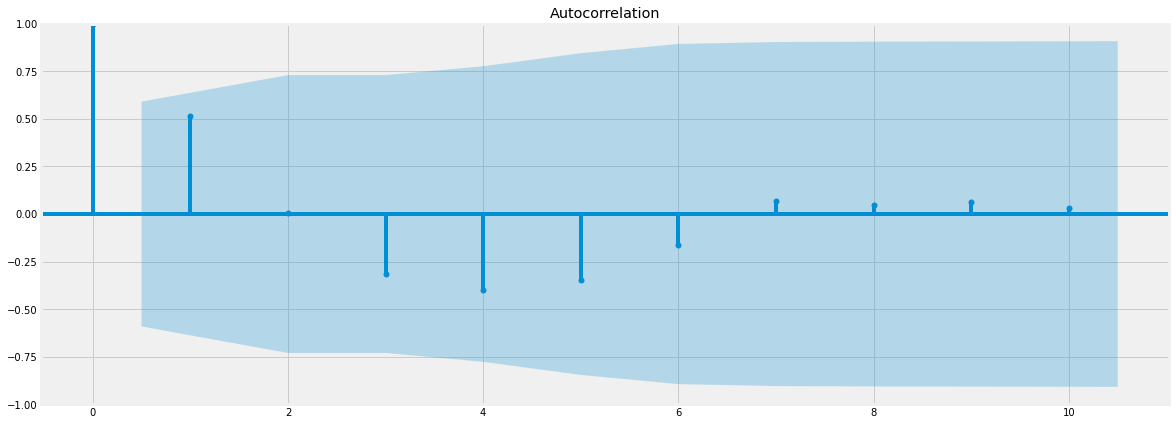

In [19]:
#Check out a plot of autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data)
plt.show()

##### The test shows that there is only one vertical line that goes above the blue edge of the confidence interval. The data might be too small, since there are only 10 rows, each with 1 year. If it was monthly data, it might yield a better result.

## 05. Stationarizing Data

In [20]:
data_diff = data - data.shift(1)

In [21]:
data_diff.dropna(inplace = True)

In [22]:
data_diff.head()

,Chronic_Respiratory_Diseases
,median
Year,
2010,264.0
2011,-1763.0
2012,526.0
2013,1657.0
2014,727.0


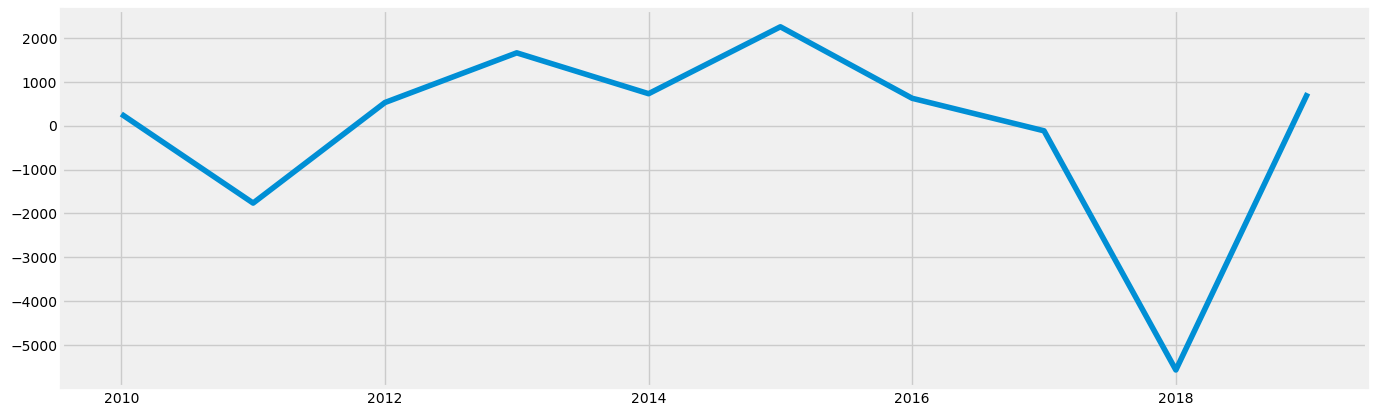

In [23]:
#Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [24]:
#Re-run the Dickey-Fuller Test to check for stationarity

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -2.624029
p-value                        0.088132
Number of Lags Used            0.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


##### The result is practically the same as the first one: test statistics (-2.64) is larger than critical value (5% = -3.28), so null hypothesis cannot be rejected. The result is more significant than the prevous one, as the p-value is more than 0.05 (0.08). Still, there is a unit root in the data, and the data is non-stationary.

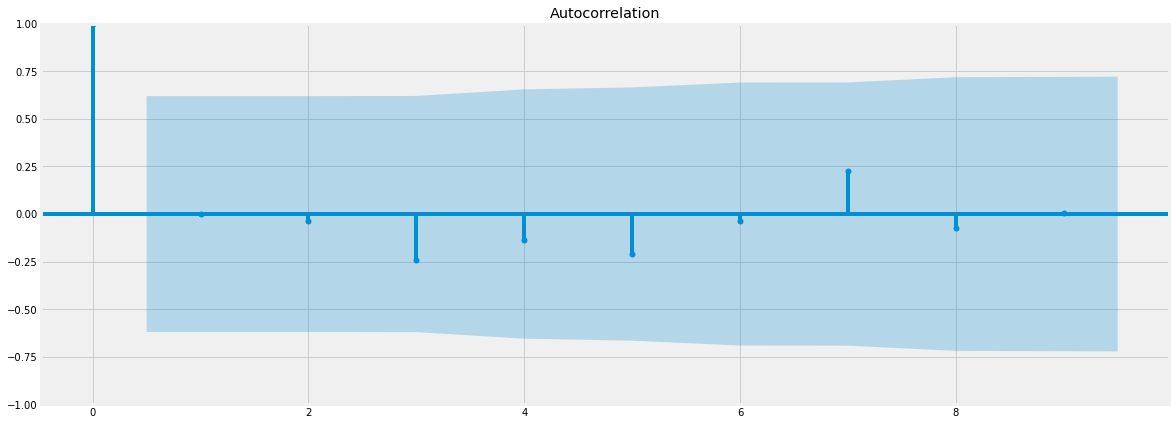

In [25]:
# Plot the autocorrelation again
plot_acf(data_diff)
plt.show()

##### The result is practically the same as in the previous autocorrelation test, only one lag is above the confidence level. There is no sense of doing further differencing, as for a new round of differencing to be necessary we need at least ten significant lags (or ten vertical lines above the confidence interval).